#### _Bài tập 2:_ Sử dụng cách thay đổi giá trị điểm ảnh và 4 công thức nhập kênh màu thành kênh xám (cho biết công thức nào tốt nhất):
- Công thức Average: (R+G+B)/3
- Công thức Max: Max(R,G,B)
- Công thức lightness: (Max(R,G,B) + Min(R,G,B))/2
- GRB(A) to gray: 0.299.R + 0.587.G + 0.114.B

_Hãy cho biết cách ghép nào giữ chi tiết tốt hơn (bằng code)_

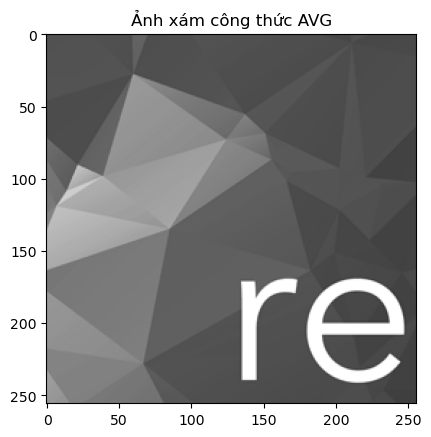

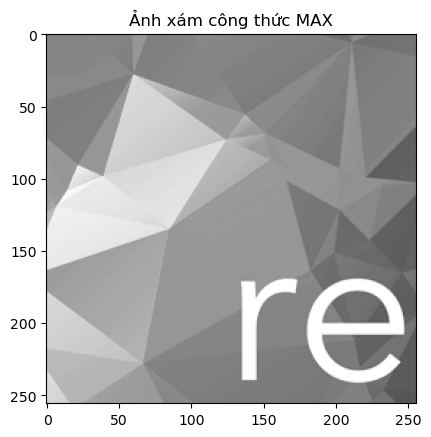

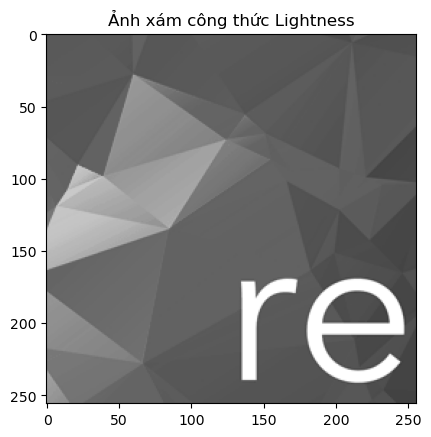

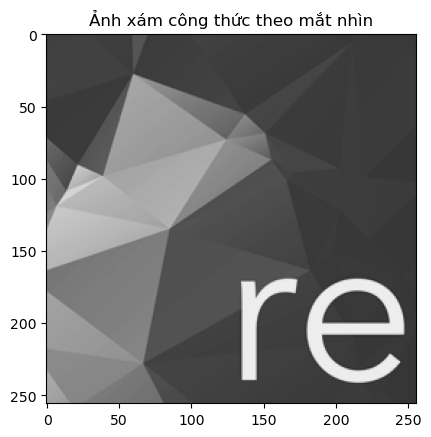

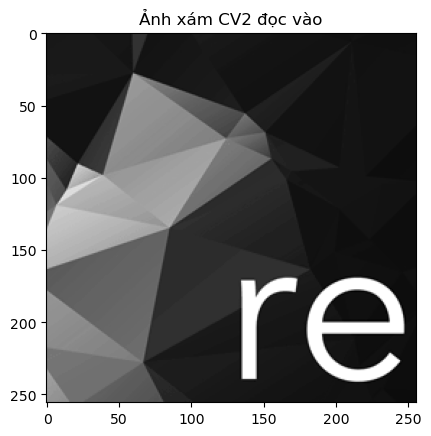

In [7]:
import enum
from pickle import FALSE, TRUE
from matplotlib import pyplot as plt
import cv2 

class GrayType(enum.Enum):
    AVG = 1
    MAX = 2
    LIGHT = 3
    EYE = 4

def Show(image, name, gray=FALSE):
    if gray:
        plt.imshow(image, cmap='gray')
    else :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(name)
    plt.show()

def Gray(image, type:GrayType):
    """ Chuyển sang ảnh xám """
    (b, g, r) = cv2.split(image)
    (height, width, channel) = image.shape
    img_1 = image.copy()
    for i in range(height):
        for j in range(width):
            if type == GrayType.AVG :
                img_1[i, j] = (int(r[i,j]) + int(g[i,j]) + int(b[i,j]))//3
            elif type == GrayType.MAX :
                img_1[i, j] = max(r[i,j], g[i,j], b[i,j])
            elif type == GrayType.LIGHT :
                img_1[i, j] = (int(max(r[i,j], g[i,j], b[i,j])) + int(min(r[i,j], g[i,j], b[i,j])))//2 % 256                
            elif type == GrayType.EYE :
                img_1[i, j] = 0.229 * r[i,j] + 0.587 * g[i,j] + 0.114 * b[i,j]
    return img_1
    
image = cv2.imread(r'd:\icon.png', cv2.IMREAD_COLOR)
Show(Gray(image, GrayType.AVG), "Ảnh xám công thức AVG")
Show(Gray(image, GrayType.MAX), "Ảnh xám công thức MAX")
Show(Gray(image, GrayType.LIGHT), "Ảnh xám công thức Lightness")
Show(Gray(image, GrayType.EYE), "Ảnh xám công thức theo mắt nhìn")
gray = cv2.imread(r'd:\icon.png', cv2.IMREAD_GRAYSCALE)
Show(gray,"Ảnh xám CV2 đọc vào", TRUE)